                  Stage  Users  Drop From Previous  % Drop  Revenue Lost (₹)  \
0                signup    435                   0    0.00                 0   
1        email_verified    294                 141   32.41             70500   
2  bank_details_entered    197                  97   32.99             48500   
3          payment_done     74                 123   62.44             61500   

   10% More Users  Extra Revenue (₹)  
0               0                  0  
1              43              21500  
2              29              14500  
3              19               9500  


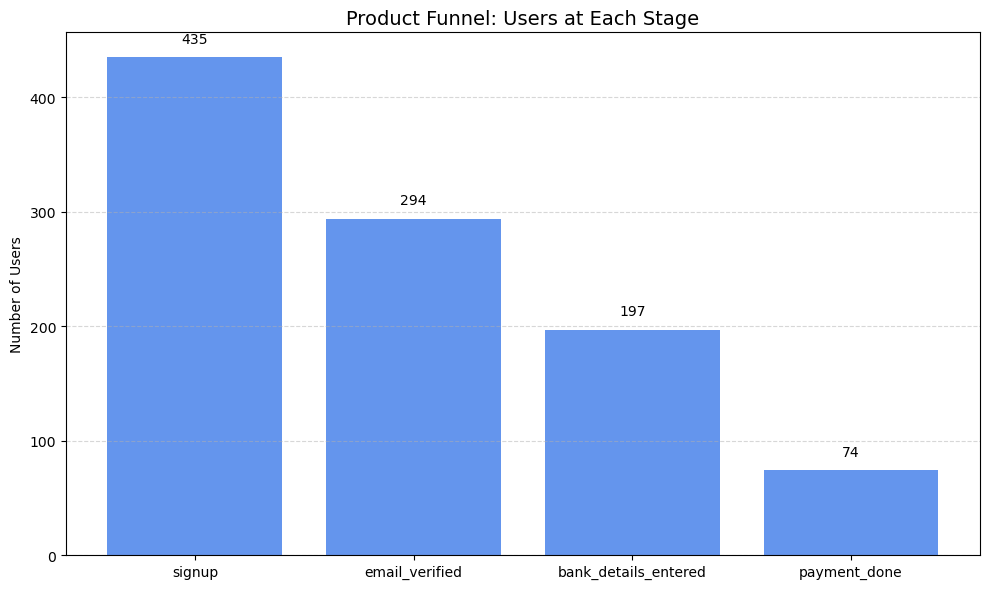

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Funnel stages and user counts
stages = ['signup', 'email_verified', 'bank_details_entered', 'payment_done']
users = np.array([435, 294, 197, 74])
revenue_per_user = 500  # ₹500 per user at final step


drop_from_prev = np.insert(np.diff(users * -1), 0, 0)
percent_drop = np.insert((drop_from_prev[1:] / users[:-1]) * 100, 0, 0).round(2)
revenue_lost = drop_from_prev * revenue_per_user
extra_users_10 = (users[:-1] * 0.10).astype(int)
extra_revenue_10 = np.insert(extra_users_10 * revenue_per_user, 0, 0)

# Combine into a DataFrame for analysis
df = pd.DataFrame({
    'Stage': stages,
    'Users': users,
    'Drop From Previous': drop_from_prev,
    '% Drop': percent_drop,
    'Revenue Lost (₹)': revenue_lost,
    '10% More Users': np.insert(extra_users_10, 0, 0),
    'Extra Revenue (₹)': extra_revenue_10
})

# Display table
print(df)

# Plotting the funnel
plt.figure(figsize=(10, 6))
bars = plt.bar(stages, users, color='cornflowerblue')

# Add labels on top of bars
for bar, user in zip(bars, users):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, str(user),
             ha='center', va='bottom', fontsize=10)

plt.title('Product Funnel: Users at Each Stage', fontsize=14)
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
